In [40]:
#import libraries to enable me read the CVS datafile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
#load csv file data with headers

location = "diamonds.csv"
df = pd.read_csv(location)

In [3]:
df['cut'].unique()
df['cut'] = df['cut'].map({'Ideal':5, 'Premium':4, 'Good':3, 'Very Good':2, 'Fair':1})
df.head()

#df.head will display the first 5 entries by default

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [5]:
df['color'] = df['color'].map({'E':7, 'I':6, 'J':5, 'H':4, 'F':3, 'G':2, 'D':1})
df.head()

#df.head will display the first 5 entries by default

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,7,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,7,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,7,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,6,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,5,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

In [7]:
df['clarity'] = df['clarity'].map({'SI2':8, 'SI1':7, 'VS1':6, 'VS2':5, 'VVS2':4, 'VVS1':3, 'I1':2, 'IF':1})
df.head()

#df.head will display the first 5 entries by default

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,7,8,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,7,7,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,7,6,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,6,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,5,8,63.3,58.0,335,4.34,4.35,2.75


In [8]:
from sklearn.linear_model import LinearRegression
X = df.drop('price', axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 14753.010812


In [11]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 10


In [12]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Unnamed: 0,0.005988
1,carat,10291.622740
2,cut,82.587231
3,color,-84.612079
4,clarity,-251.105316
5,depth,-150.361495
6,table,-57.011799
7,x,-1028.274474
8,y,86.941979
9,z,61.000808


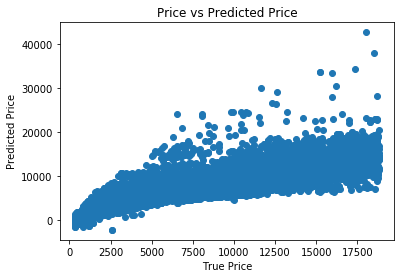

In [13]:
plt.scatter(df.price, lm.predict(X))
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [14]:
df.tail()
#df.tail will display the last 5 entries by default

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,5,1,7,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,3,1,7,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,2,1,7,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,4,4,8,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,5,1,8,62.2,55.0,2757,5.83,5.87,3.64


In [15]:
import statsmodels.formula.api as smf

In [16]:
result = smf.ols('price ~ cut + carat + color', data=df).fit()

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.054e+05
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:24:25   Log-Likelihood:            -4.7182e+05
No. Observations:               53940   AIC:                         9.437e+05
Df Residuals:                   53936   BIC:                         9.437e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2663.9194     27.328    -97.480      0.000   -2717.482   -2610.356
cut          175.9663      5.214     33.746      0.000     165.746     186.187
carat       7833.6851     13.950    561.535      0.000    7806.342    7861.028
color        -83.0381      3.206    -25.904      0.000     -89.321     -76.755
==============================================================================
Omnibus:                    14102.855   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154857.141
Skew:                           0.944   Prob(JB):                         0.00
Kurtosis:                      11.083   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [19]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut             int64
color           int64
clarity         int64
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [20]:
df.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [21]:
df.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,3.771060,3.825584,5.743864,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.265976,2.050156,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,2.000000,2.000000,5.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,4.000000,3.000000,6.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,5.000000,6.000000,7.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
df.groupby('color')

In [23]:
df['price'].min()

326

In [24]:
df['price'].groupby(df['cut']).mean()
#df[['hours', 'exercise']].groupby(df['gender']).mean()

cut
1    4358.757764
2    3981.759891
3    3928.864452
4    4584.257704
5    3457.541970
Name: price, dtype: float64

In [25]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [26]:
#dupe = df.duplicated()
rep = df.duplicated()
df.loc[rep]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#%matplotlib inline
#sns.set_style('darkgrid') #my default is "whitegrid"

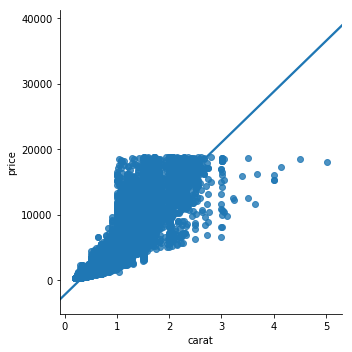

In [28]:
#make a scatterplot
sns.lmplot(x='carat', y='price', data=df)

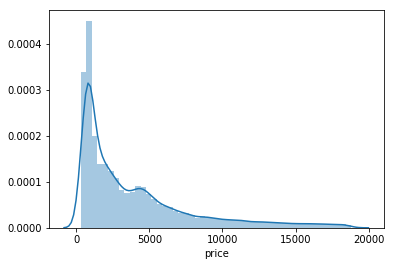

In [29]:
#create a histogram of the distribution of diamond prices
sns.distplot(df['price'])

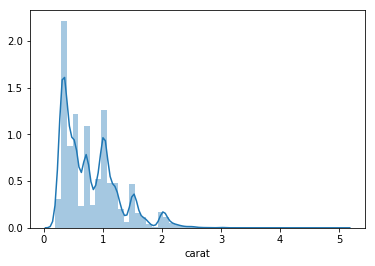

In [30]:
#create a histogram of the distribution of carat
sns.distplot(df['carat'])

In [31]:
#extract target variable
#make copy of 'price' column
y = df['price']

In [32]:
#copy of modeldf without 'price' column
X = df.drop(['price'], axis=1)

In [33]:
#80% for training data, 20% for test data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=15)

In [34]:
#build logistic regression model
X_train_subset = X_train.head(100)
y_train_subset = y_train.head(100)
LogReg = LogisticRegression()
LogReg.fit(X_train_subset, y_train_subset)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
#accuracy score of model using training data
LogReg.score(X_train, y_train)

0.0075778642936596219

In [36]:
#generate prediction values
y_pred = LogReg.predict(X_test)